In [25]:
from pathlib import Path

from prepare_data import get_dataframe

crud = get_dataframe(
    Path("../../Static Analysis/impl-crud/crud_MOOD.csv")
)
cqrs = get_dataframe(
    Path("../../Static Analysis/impl-es-cqrs/es-cqrs-mood.csv")
)

In [26]:
labels = crud.columns[1:].tolist()
labels.remove("PF")

In [27]:
# cleanup
for df in [crud, cqrs]:
    df.drop("PF", axis=1, inplace=True)

    for col in labels:
        df[col] = (
            df[col]
            .astype(str)
            .str.replace(",", ".")
            .str.replace("%", "", regex=False)
            .astype(float)
        )

In [28]:

crud_data = crud[labels].values[0]
cqrs_data = cqrs[labels].values[0]

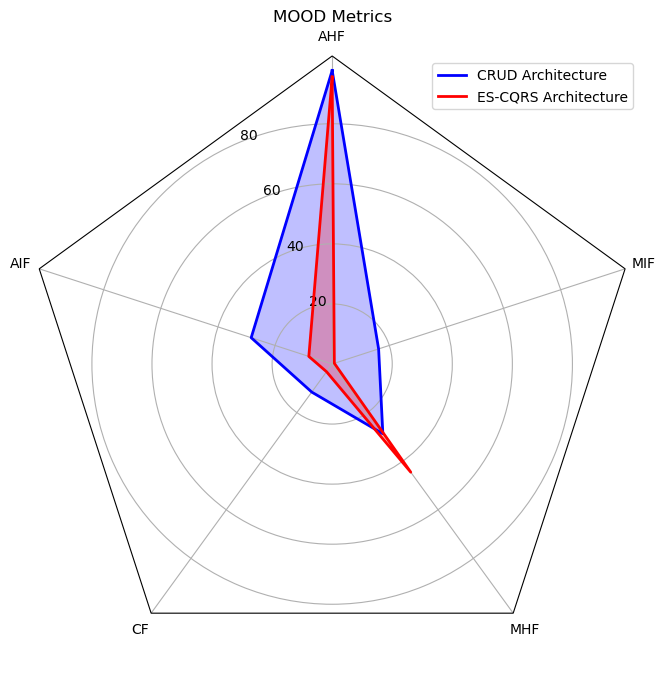

In [34]:
import matplotlib.pyplot as plt
from spider_plot import radar_factory

plt.style.use('default')

N = len(labels)
theta = radar_factory(N, frame='polygon')

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(projection='radar'))

# Plot the data
ax.plot(theta, crud_data, color='b', label="CRUD Architecture", linewidth=2)
ax.fill(theta, crud_data, facecolor='b', alpha=0.25)

ax.plot(theta, cqrs_data, color='r', label="ES-CQRS Architecture", linewidth=2)
ax.fill(theta, cqrs_data, facecolor='r', alpha=0.25)

ax.set_varlabels(labels)
ax.set_rgrids([20, 40, 60, 80])
ax.set_title("MOOD Metrics", position=(0.5, 1.1), ha='center')
ax.legend()

plt.show()